Importing libraries and loading data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("ai_job_trends_dataset.csv")


Encoding target variable 'Job Status'

In [33]:
data['Job Status'] = data['Job Status'].map({'Increasing': 1, 'Decreasing': 0})

Encoding categorical features

In [34]:
data_encoded = pd.get_dummies(data, drop_first=True)

Splitting features and target

In [35]:
X = data_encoded.drop("Job Status", axis=1)
y = data_encoded["Job Status"]


Train/test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training predictive models and evaluating performance

Random Forest Accuracy: 0.5041666666666667
              precision    recall  f1-score   support

           0       0.51      0.19      0.27      2987
           1       0.50      0.82      0.62      3013

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.45      6000
weighted avg       0.50      0.50      0.45      6000



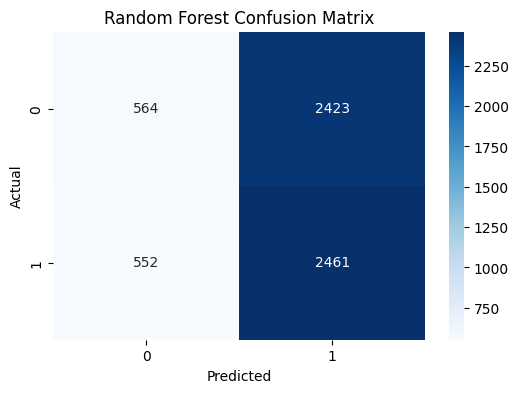

In [38]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,    
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1 
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

#Confusion matrix
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()